<a href="https://colab.research.google.com/github/logansmith9454/cse450/blob/main/notebooks/starter_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# !pip install scikit-learn==1.5.2

In [62]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

def transform_data(df, train_cols=None):
  # Add sale_year and sale_month columns
  df['sale_year'] = pd.to_datetime(df['date']).dt.year
  df['sale_month'] = pd.to_datetime(df['date']).dt.month

  df = df.drop(['date'], axis=1)

  cat_cols = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
  num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
            'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sale_year', 'sale_month']

  if 'price' in df.columns:
      X = pd.get_dummies(df.drop('price', axis=1), columns=cat_cols)
      y = df['price']
  else:
      X = pd.get_dummies(df, columns=cat_cols)
      y = None

  if train_cols is not None:
      X = X.reindex(columns=train_cols, fill_value=0)


  return X, y, X.columns.tolist()


X, y, train_cols = transform_data(housing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = xgb.XGBRegressor(enable_categorical=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: ${rmse:,.2f}")
print(f"R^2: {r2:.1%}")

RMSE: $112,602.20
R^2: 90.0%


In [43]:
from sklearn.model_selection import GridSearchCV

# Define expanded parameter grid for XGBoost
param_grid = {
    'regressor__n_estimators': [250, 500, 750],
    'regressor__learning_rate': [0.05, 0.1, 0.15],
    'regressor__max_depth': [2, 3, 4],
    'regressor__subsample': [0.6, 0.7],
    'regressor__colsample_bytree': [0.6, 0.7]
}

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=model,  # Your existing pipeline
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimize for MSE
    n_jobs=-1  # Use all CPU cores
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Print best parameters
print(f'Best Parameters: {grid_search.best_params_}')

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:02:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "regressor__colsample_bytree", "regressor__learning_rate", "regressor__max_depth", "regressor__n_estimators", "regressor__subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'regressor__colsample_bytree': 0.6, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 2, 'regressor__n_estimators': 250, 'regressor__subsample': 0.6}


KeyboardInterrupt: 

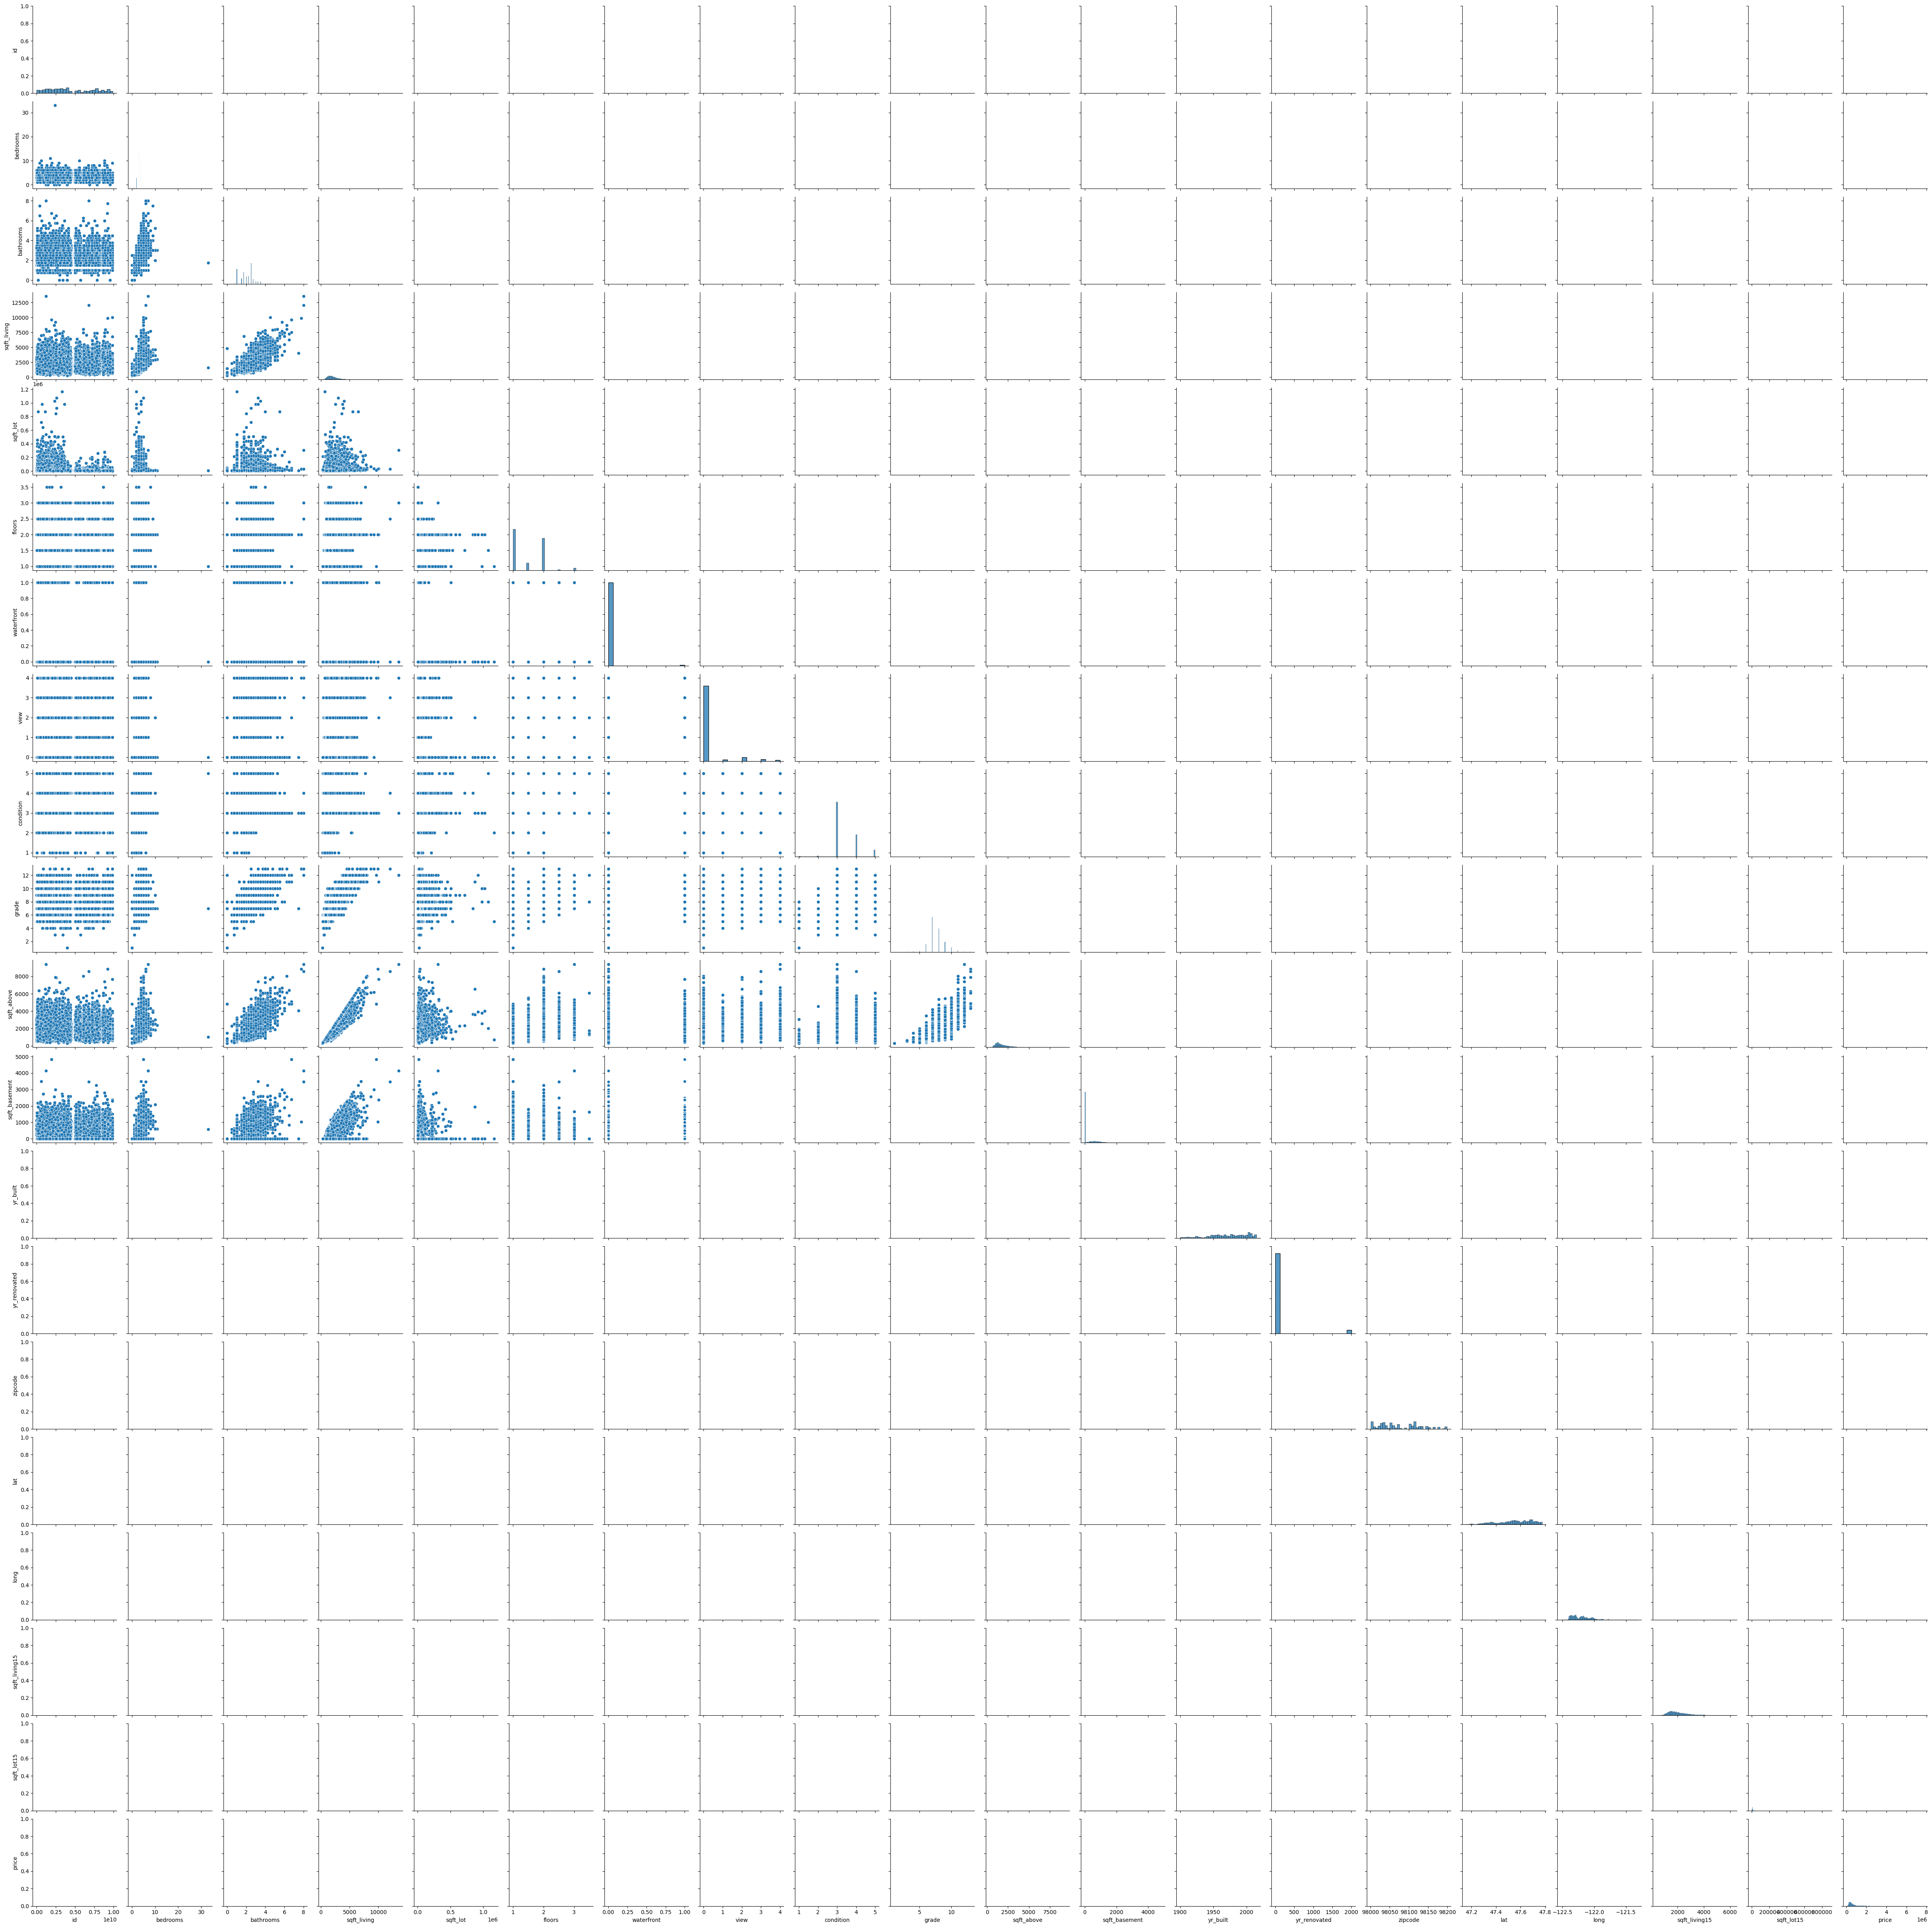

In [52]:
import seaborn as sns
sns.pairplot(housing)

In [63]:
from google.colab import files
mini_holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv')

mini_X, _, _ = transform_data(mini_holdout, train_cols=train_cols) # Get only the features, y will be None

mini_y_pred = model.predict(mini_X)

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame(mini_y_pred, columns=['price'])

# Save the DataFrame to a CSV file
file_name = 'v2-team1-module3-predictions.csv'
predictions_df.to_csv(file_name, index=False)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
from google.colab import files
holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv')

X, _, _ = transform_data(holdout, train_cols=train_cols)

y_pred = model.predict(X)

predictions_df = pd.DataFrame(y_pred, columns=['price'])

print(f"{len(holdout)=}")
print(f"{len(predictions_df)=}")

# Save the DataFrame to a CSV file
# file_name = 'v2-team1-module3-predictions.csv'
# predictions_df.to_csv(file_name, index=False)
# files.download(file_name)

len(mini_holdout)=1613
len(predictions_df)=1613
